<a href="https://colab.research.google.com/github/liviasantos08/Analise-de-Dados-com-Python/blob/main/Trabalhando_com_planilhas_excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando a biblioteca panda
import pandas as pd

In [ ]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [ ]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Exibi as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#As últimas 5 linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Pega uma amostra de 5 linhas
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
233,Natal,2019-01-03,172.40,1036,2
117,Natal,2019-01-02,39.41,1034,1
30,Aracaju,2018-01-01,119.21,1520,8
226,Natal,2019-01-02,38.32,1035,2
117,Recife,2019-03-02,15.42,983,8


In [ ]:
#Verificado o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dado de cada coluna
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

#**Tratando valores faltantes**

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

#**Criando colunas novas**

In [ ]:
#Criando a coluna Receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Criando a coluna Receita/Vendas
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a meno receita
df["Receita"].min()

3.34

In [ ]:
#nlargest, retorna as 3 linhas com as maiores receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#Retorna as 3 piores receitas
df.nsmallest(3, "Receita")


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#Agrupamento por cidade das receitas
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Agrupamento de vendas por cidade
df.groupby("Cidade")["Vendas"].sum()

Cidade
Aracaju       9472.98
Fortaleza    10120.71
Natal        59187.76
Recife       11119.10
Salvador     19714.40
Name: Vendas, dtype: float64

In [ ]:
#Ordenando as maiores receitas
df.sort_values("Receita", ascending=False).head(10)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [ ]:
#Agrupamento da Receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018


In [ ]:
#Extraindo o mês e o dia 
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,trimestre_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1,1


In [ ]:
#Filtrando as vendas de 2017 do mês de fevereiro
vendas_fev_18 = df.loc[(df["Data"].dt.year == 2018) & (df["Data"].dt.month == 2)]
vendas_fev_18

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,trimestre_venda
15,Natal,2018-02-01,432.0,854,3,1296.0,3.0,2018,2,1,1
17,Natal,2018-02-18,276.0,854,3,828.0,3.0,2018,2,18,1
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0,2018,2,25,1
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0,2018,2,10,1
63,Natal,2018-02-12,552.0,852,2,1104.0,2.0,2018,2,12,1


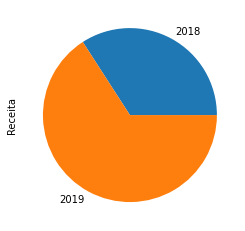

In [ ]:
#gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

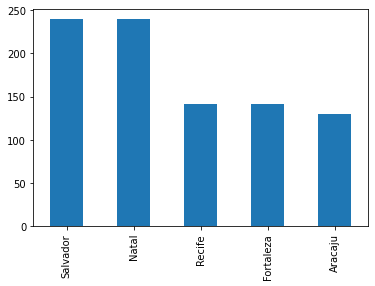

In [ ]:

#gráfico de barras
df["Cidade"].value_counts(ascending=False).plot.bar();

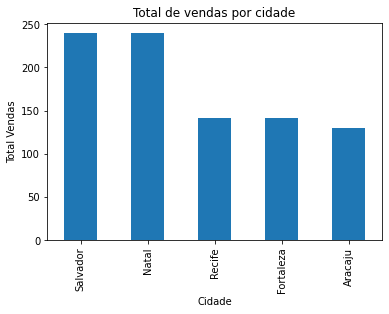

In [ ]:
#Adicionando um titulo e alterando o nome dos eixo(CidadeXTotal de vendas)
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

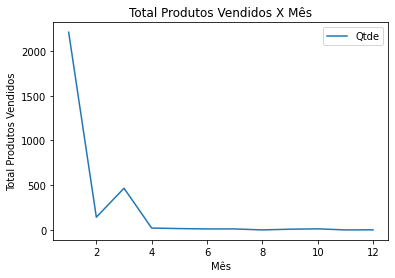

In [ ]:
#Cria um gráfico de linhas
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos Vendidos X Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

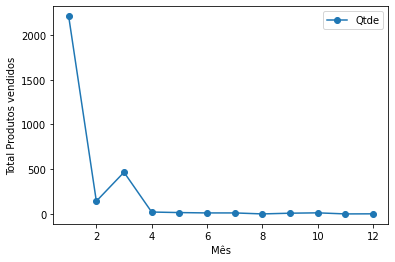

In [ ]:
#Total produtos vendidos por mês
df.groupby(df["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend();

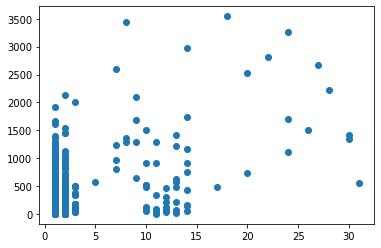

In [ ]:
#Gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

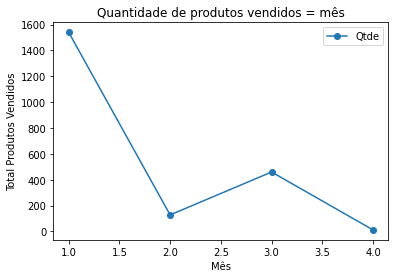

In [ ]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos = mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("gráfico QTDE = MES.png")